# 图形的组成(Parts of a Figure）

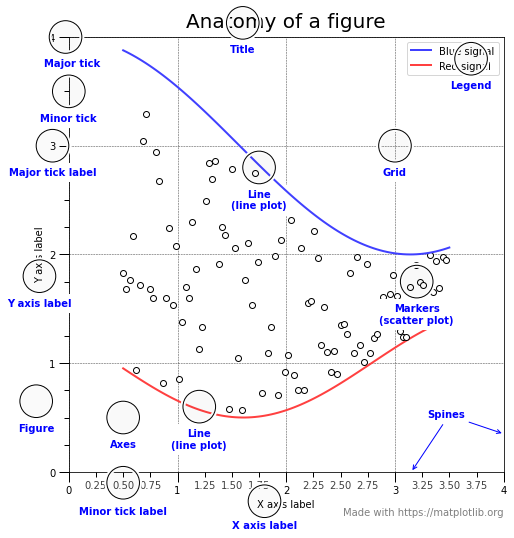

In [1]:
#以下代码用于生成图示，不作为例子！
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return f"{x:.2f}"

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

# FuncFormatter is created and used automatically
ax.xaxis.set_minor_formatter(minor_tick)

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend(loc="upper right")


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with https://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

axes, axis:轴(域)，轴线
legend:图例                        spines: 脊，边框；
                                        ax.spines['right'].set_color('none')
                                        ax.spines['top'].set_color('none')
Major tick:主要刻度                 Minor tick：分刻度
Markers标记（scatter plot：散点图）  line plot：线形图
Grid： 格子，格栅                    scatter:散点图
X axis label: x轴标签
Minor tick label: 分刻度标签        Major tick label: 主刻度标签

figure就好像是画板，是画纸的载体，但是具体画画等操作是在画纸上完成的。
在pyplot中，画纸的概念对应的就是Axes/Subplot

In [2]:
import matplotlib.pyplot as plt

最简单的产生figure的方法是使用pyplot

In [3]:
fig = plt.figure()   # an empty figure with no Axes
plt.show()

<Figure size 432x288 with 0 Axes>

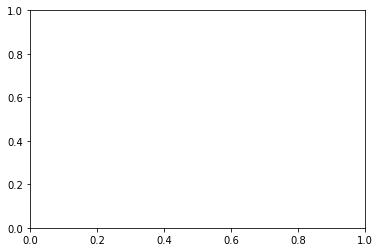

In [4]:
fig, ax = plt.subplots()  # a figure with a single Axes
plt.show()

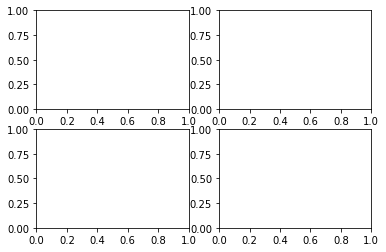

In [5]:
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
plt.show()

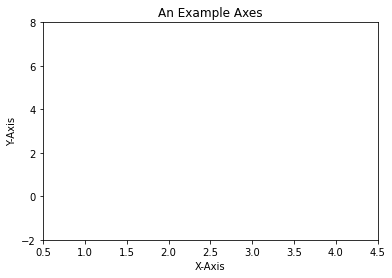

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes', ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

Axes 和 Subplot 的概念上细微的区别

<class 'matplotlib.axes._subplots.AxesSubplot'>


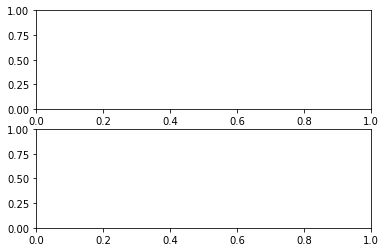

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
print(type(ax1))
plt.show()


此例用add_axes()方法

<class 'matplotlib.axes._axes.Axes'>


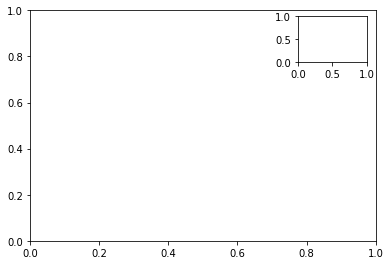

In [8]:
fig = plt.figure()
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.8])   # 0.8, 0.8还是轴长度
ax4 = fig.add_axes([0.72, 0.72, 0.16, 0.16])

print(type(ax3)) 
plt.show()


总结：两种对象确实是“你中有我，我中有你”的关系，
生成子图(subplot)的时候，必然带着所谓的一套轴域(Axes)。
而用轴域(Axes)方法，客观上就是生成了一个可以画图的子图。
add_subplot()方法在生成子图过程，简单明了，而用add_axes()方法,则生成子图的灵活性更强，完全可以实现add_subplot()方法的功能，可以控制子图显示位置，甚至实现相互重叠的效果

函数式编程和对象式编程

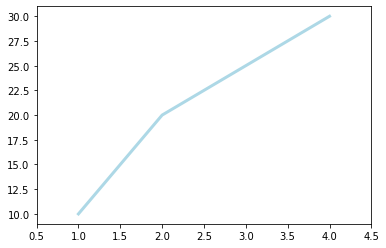

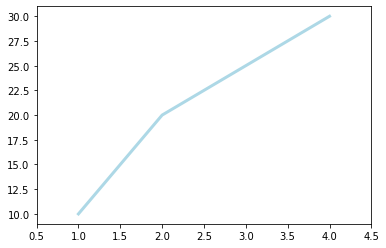

In [9]:
'''函数式'''
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.xlim(0.5, 4.5)
plt.show()

'''对象式'''
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3) 
ax.set_xlim(0.5, 4.5)
plt.show()


以 plot() 为代表的函数式操作，表达简洁，但是没有体现出真正画图的实现过程，例如甚至当没有搞清楚Figure Axes Subplot 等概念的时候，依然可以轻松的用pyplot函数画图。当子图较多的时候，对子图的操作容易陷入混乱，因为从代码上并不能直接观察出到底在操作那张子图。以 .plot 为代表的对象式操作，表达明确，分步生成 Figure 和 Axes/Subplot，操作过程直接可以看出是在那张子图上操作。但是缺点就是，需要写的代码比较多，不够简洁。

Axis: 轴，数字线

Artist：图上一切东西叫表演者，包括图形、轴域和轴对象等等。。。

画一个坐标系

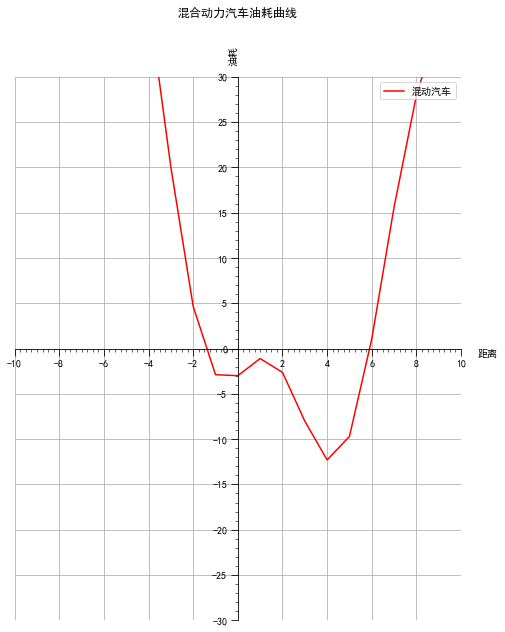

In [10]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.set_xlim(-10,10)
ax.set_ylim(-30,30)
ax.spines['bottom'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('axes',0.5))  # 50%

# 在 Matplotlib中，默认的刻度是由locator类控制，
# 其中子类 MultipleLocator和 FormatStrFormatter可以人为修改，
# 两个类的字面意思不难理解, 一个负责位置，一个负责样式
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
xmajorLocator = MultipleLocator(2)
ax.xaxis.set_major_locator(xmajorLocator)
ymajorLocator = MultipleLocator(5)
ax.yaxis.set_major_locator(ymajorLocator)
xminorLocator = MultipleLocator(0.25)
ax.xaxis.set_minor_locator(xminorLocator)
yminorLocator = MultipleLocator(1)
ax.yaxis.set_minor_locator(yminorLocator)
# 放大主附刻度线
ax.tick_params(which='major',length=7,labelsize=10)
ax.tick_params(which='minor',length=3)

plt.rcParams['font.sans-serif']=['SimHei']   #显示汉字
plt.rcParams['axes.unicode_minus'] = False   #显示 - 号
ax.xaxis.set_label_coords(1.06,0.5)   # （0，1）之间的百分比
ax.yaxis.set_label_coords(0.5,1.04)   # （0，1）之间的百分比
ax.set_xlabel('距离')
ax.set_ylabel('油耗')

'''报告 UserWarning: FixedFormatter should only be used together with FixedLocator
ax_main.set_xticklabels(xlabels)
xticks = ax.get_xticks()
xticklabels = [str(int(i)) for i in xticks]
xticklabels[int((len(xticks)-1)/2)]=''
ax.set_xticklabels(xticklabels)
FixedFormatter(刻度形式) 只能与 FixedLocator定位器 一起使用，而不能使用其他方法改变刻度形式''' 

import matplotlib.ticker as mticker
label_format = '{:,.0f}'  # 创建浮点数格式 .0f无小数
xticks = ax.get_xticks().tolist()
ax.xaxis.set_major_locator(mticker.FixedLocator(xticks))  # 定位到点线图的x轴
ax.set_xticklabels([label_format.format(x) if x!=0 else '' for x in xticks])  # 使用列表推导式循环将刻度转换成浮点数

import numpy as np, math
x=np.linspace(-9,9,19)
y= x**2-x*5+[math.sin(alph)*7 for alph in x]-3 
ax.plot(x,y,color='red',label='混动汽车')

ax.set_title('混合动力汽车油耗曲线',y=1.1)

plt.grid()
plt.legend(loc='upper right')

plt.show()

图例（lengend）

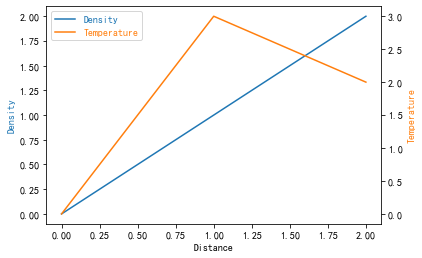

In [11]:
from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)

par = host.twinx()

host.set_xlabel("Distance")
host.set_ylabel("Density")
par.set_ylabel("Temperature")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par.plot([0, 1, 2], [0, 3, 2], label="Temperature")

leg = plt.legend()

host.yaxis.get_label().set_color(p1.get_color())
leg.texts[0].set_color(p1.get_color())

par.yaxis.get_label().set_color(p2.get_color())
leg.texts[1].set_color(p2.get_color())

plt.show()


# 面向对象 interface 和pyplot interface

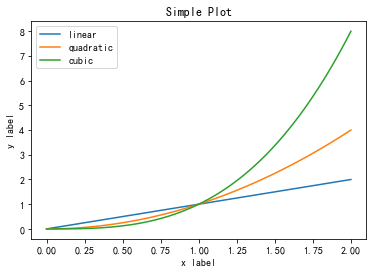

In [12]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)

import matplotlib.pyplot as plt
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.


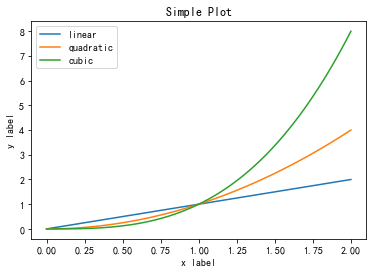

In [13]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()


# 图的种类 plot, scatter, bar, barh, hist

点线图 plot

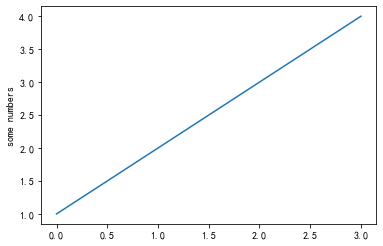

In [14]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])    # x取缺省值[0,1,2,3]与y值[1,2,3,4]对应
plt.ylabel('some numbers')
plt.show()


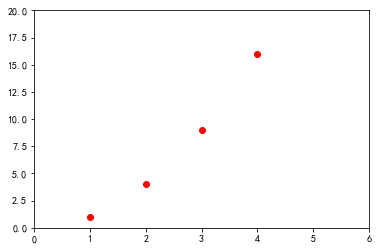

In [15]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')   # r表示红色，o表示圆点
plt.axis([0, 6, 0, 20])    # x y轴的刻度 [xmin, xmax, ymin, ymax]
plt.show()


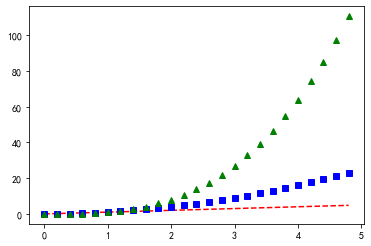

In [16]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') # 画多条曲线
plt.show()


散点图 scatter

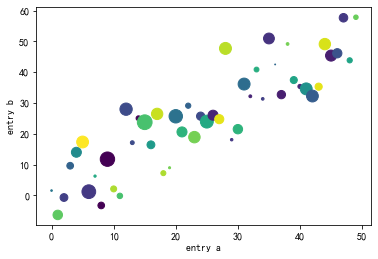

In [17]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)   #s:size,c:color 

plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

In [18]:
'''
defaults to rcParams["axes.prop_cycle"] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']).
'''

'\ndefaults to rcParams["axes.prop_cycle"] = cycler(\'color\', [\'#1f77b4\', \'#ff7f0e\', \'#2ca02c\', \'#d62728\', \'#9467bd\', \'#8c564b\', \'#e377c2\', \'#7f7f7f\', \'#bcbd22\', \'#17becf\']).\n'

柱状图 bar

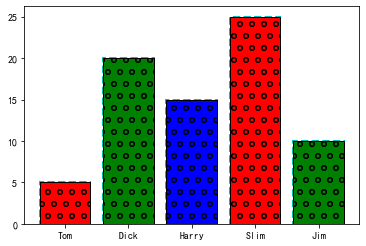

In [19]:
import matplotlib.pyplot as plt

data = [5, 20, 15, 25, 10]
labels = ['Tom', 'Dick', 'Harry', 'Slim', 'Jim']

plt.bar(range(len(data)), data, ec='c', ls='--', lw=2)
plt.bar(range(len(data)), data, color=['r', 'g', 'b'],tick_label=labels, ec='k', lw=1, hatch='o')

plt.show()


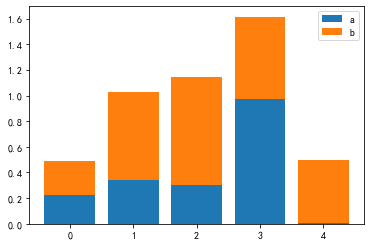

In [20]:
import numpy as np
import matplotlib.pyplot as plt

size = 5
x = np.arange(size)
a = np.random.random(size)
b = np.random.random(size)

plt.bar(x, a, label='a')
plt.bar(x, b, bottom=a, label='b')
plt.legend()
plt.show()


条形图 barh

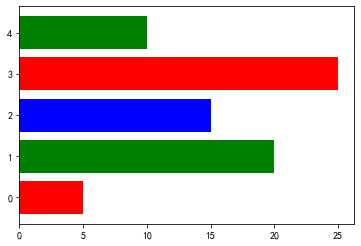

In [21]:
import matplotlib.pyplot as plt

data = [5, 20, 15, 25, 10]

plt.barh(range(len(data)), data, color=['r','g','b'])
plt.show()


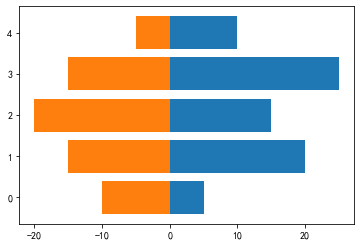

In [22]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([5, 20, 15, 25, 10])
b = np.array([10, 15, 20, 15, 5])

plt.barh(range(len(a)), a)
plt.barh(range(len(b)), -b)
plt.show()


直方图

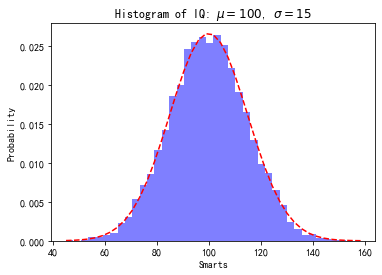

In [23]:
import numpy as np 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt 
  
# example data 
mu = 100 # mean of distribution 
sigma = 15 # standard deviation of distribution 
x = mu + sigma * np.random.randn(10000) 
  
num_bins = 40
# the histogram of the data 
n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='blue', alpha=0.5) 
# add a 'best fit' line 
from scipy.stats import norm
y = norm.pdf(bins, mu, sigma) 
plt.plot(bins, y, 'r--') 
plt.xlabel('Smarts') 
plt.ylabel('Probability') 
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$') 
  
# Tweak spacing to prevent clipping of ylabel 
plt.subplots_adjust(left=0.15) 
plt.show()

In [24]:
#分类数据

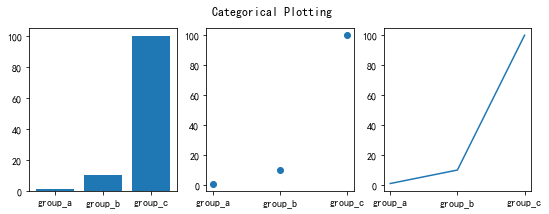

In [25]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)    # 分类数据
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()


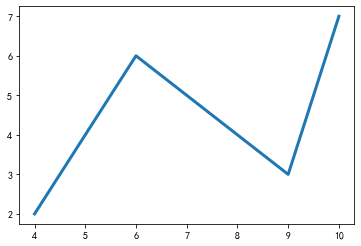

In [26]:
y=[2,6,3,7]
x=[4,6,9,10]

plt.plot(x, y, lw=3.0)  # plt.plot(x, y, linewidth=2.0)

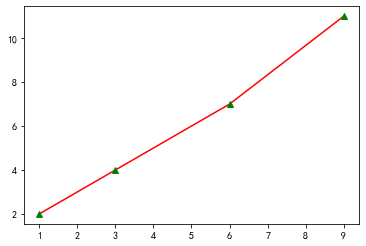

In [27]:
x=[1,3,6,9]
y=[2,4,7,11]
line, = plt.plot(x, y, 'r-')
line, = plt.plot(x, y, 'g^')
line.set_antialiased(False) # turn off antialiasing 禁用抗锯齿
plt.show() 


In [28]:
#控制曲线特性

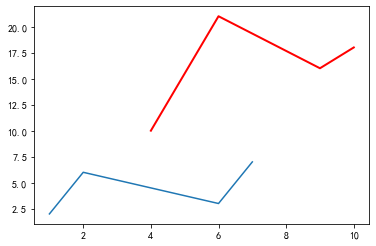

In [29]:
x1=[1,2,6,7]
y1=[2,6,3,7]
x2=[4,6,9,10]
y2=[10,21,16,18]
lines = plt.plot(x1, y1, x2, y2)
# use keyword args
plt.setp(lines[1], color='r', linewidth=2.0)  # 控制曲线特性
# or MATLAB style string value pairs
# plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
plt.show()


In [30]:
# 使用函数画图

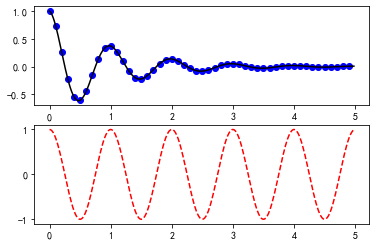

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')  # 使用函数画图

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


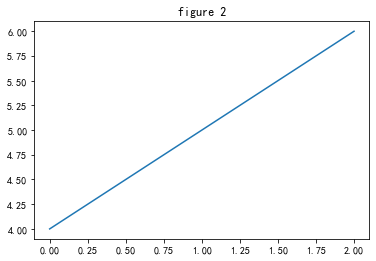

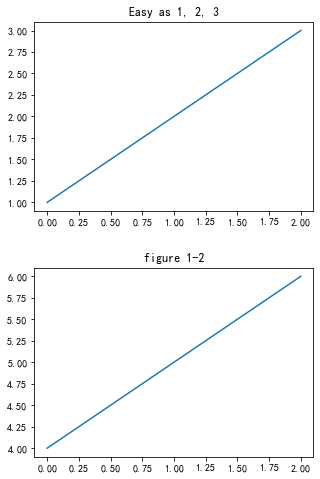

In [32]:
plt.figure(1,figsize=(5,8))  # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])
plt.title('figure 1-2') 

plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default
plt.title('figure 2') 

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

#fig.tight_layout()                           #调整整体空白
plt.subplots_adjust(wspace =0, hspace =0.3)   #调整子图间距

图注（plt.text(60, .025, r'$\mu=100,\ \sigma=15$')）

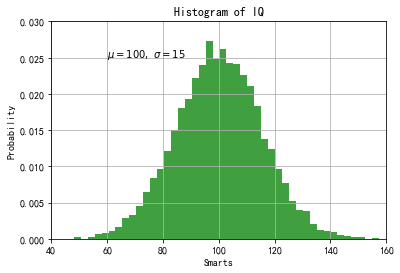

In [33]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data 直方图：数据分布图
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()


In [34]:
annotate 箭头评注

SyntaxError: invalid syntax (794405032.py, line 1)

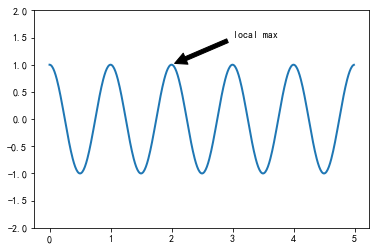

In [ ]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), # xytext:文本的位置
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()


非线性轴 plt.yscale

In [ ]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()

x = np.arange(len(y))
print(x[0],x[1],x[2],'...',x[-1],'\n',y[0:4])

0 1 2 ... 798 
 [0.00504436 0.00728387 0.00768518 0.00911896]


[-5.289484794262018, -4.9220927074951435, -4.868461633590929]


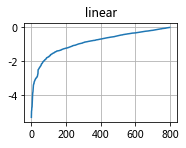

In [ ]:
plt.figure()
# linear  线性
plt.subplot(221)
plt.plot(x, [math.log(alph) for alph in y])
plt.yscale('linear')
plt.title('linear')
plt.grid(True)
print([math.log(alph) for alph in y][0:3])

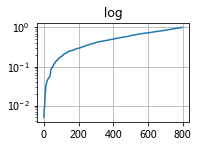

In [ ]:
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
# log 对数
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

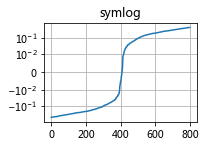

In [ ]:
# symmetric log 对称对数
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

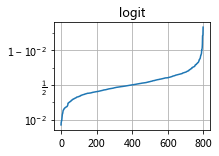

In [ ]:
# logit 逻辑回归
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)



In [ ]:
极区图 projection='polar'

theta: [0.         0.39269908 0.78539816 1.17809725]
radii: [1 2 3 4]


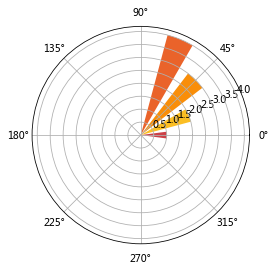

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ax1 = plt.subplot(111, projection='polar')
# 数据：角度和极径
theta = np.arange(0, np.pi/2, 2*np.pi/16)  # 角度数据
radii = np.arange(1,len(theta)+1,1)     #极径数据
print('theta:',theta)
print('radii:',radii)
 
# 作图, width表示极区所占的区域
key_values = [0.1,0.7,0.5,0.3]
from matplotlib import cm
norm = plt.Normalize(-1,1)
norm_values = norm(key_values)
map_vir = cm.get_cmap(name='clor ')
colors = map_vir(norm_values)
ax1.bar(theta,radii,color=colors, width=(2*np.pi/24))
plt.show()


In [35]:
%%html
<img src="matplotlib_color bar.png" height="6">